In [1]:
import numpy as np

from scipy.io import loadmat
from scipy import optimize

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import NonUniformImage
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

# 1 Logistic Regression (One vs. All Classification)

## 1.1 Data Visualisation

In [2]:
file_path = '../course_materials/ex3data1.mat'
data = loadmat(file_path)
print(f"X {data['X'].shape}")
print(f"y {data['y'].shape}")

X (5000, 400)
y (5000, 1)


In [3]:
np.random.seed(0)
def digitDatum(x):
    '''converts vector x (1,400) into a matrix(32,32)'''
#     by default order='C', but in this case the lines are assembled in wrong order
    return np.reshape(x, (-1, 20), order='F')

def show_random_digit(n_samples):
    fig = plt.figure(figsize=(2, 2))
    digit = digitDatum(data['X'][np.random.randint(n_samples)])
    plt.imshow(digit, cmap = 'gist_gray')
    plt.axis('off')
    return plt.show()

def show_hundred_digits(visualisationSet):
    fig = plt.figure(figsize=(6, 6))
    for row in range(10):
        for column in range(10):
            digit = digitDatum(visualisationSet[10*row+column])
            sub = plt.subplot(10, 10, 10*row+column+1)
            sub.axis('off')
            sub.imshow(digit, cmap = 'gist_gray')
    return plt.show()

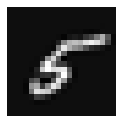

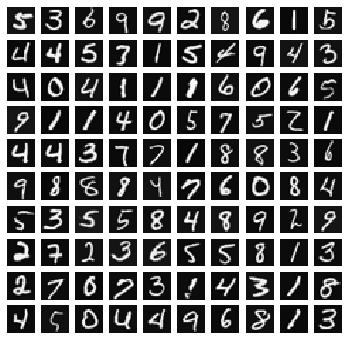

In [4]:
n_samples, n_variables = data['X'].shape
show_random_digit(n_samples)
random_index = np.random.randint(5000, size = 100)
visualisationSet = data['X'][random_index,:]
show_hundred_digits(visualisationSet)


## 1.2 Data Extraction and Transformation

In [5]:
def get_data(file_path):
    data = loadmat(file_path)
    X = np.insert(data['X'], 0, 1, axis=1)
    y = data['y']
    n_samples, n_variables = X.shape
    β = np.zeros(n_variables)
    return β, X, y

In [6]:
def get_sigmoid(z):
    return 1/(1+np.exp(-z))

def get_hypothesis(β, X):
#     h(5000x1) = X(5000x401)*β(401x1)
    return get_sigmoid(np.dot(X, β[:, None]))

def cost_function(β, X, y, λ = 0.):
    n_samples, n_variables = X.shape  # X(5000x401)
#     hypothesis vector h(5000x1) = X(5000x401)*β(401x1)
    h = get_hypothesis(β, X)
#     cost function scalar J (1x1) = y.T(1x5000)*h(5000x1)
    J = (- np.dot(y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))/n_samples
#     regularisation scalar (R)
    R = λ*np.dot(β[1:].T,β[1:])/(2*n_samples)
#     return (cost.item(0))
    return (J + R)[0,0]

def get_gradient(β, X, y, λ=0.):
    n_samples, n_variables = X.shape
#     hypothesis (h)
    h = get_hypothesis(β, X)
#     error vector e(5000x1) = h(5000x1) - y(5000x1)
    e = h - y
#     gradient vector g(401x1) = e.T(1x5000)*X(401x5000)
    g = np.dot(X.T,e)/(n_samples)
#     regularisation term vector (r(400x1)) — derivative of the regularisation term of the cost funtion
    r = β[1:, None]*(λ/n_samples)
    g[1:] = g[1:] + r
    return g.flatten()

In [7]:
pathToWeightsfile_path = '../course_materials/ex3weights.mat'
weights = loadmat(pathToWeightsfile_path)
weights['Theta1'].shape

(25, 401)

In [8]:
β, X, y = get_data(file_path)
print(get_hypothesis(β, X))
print(β[:, None].shape)
print(β.shape)
print(get_gradient(β, X, y, λ=0.).shape)
print(cost_function(β, X, y, λ = 0.))

[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]
(401, 1)
(401,)
(401,)
160.39425758157174


In [9]:
def optimise_β(β, X, y, λ=0.):
    β_array = {}
    for i in np.unique(data['y']):
        
        β_optimised = optimize.minimize(cost_function, β, args=(X, y == i, λ), method=None,
                                          jac=get_gradient, options={'maxiter':50})
        β_array[i] = β_optimised['x']

#         β_optimised = optimize.fmin_cg(cost_function, fprime=gradient, x0=β, args=(X, y == i, λ),
#                                          maxiter=50, disp=False, full_output=True)
#         β_array[i] = β_optimised[0]
    return(β_array)

In [10]:
def ONEvsALL_classifier(β, x, yOptions):
    assignmentScore = {} 
    for i in yOptions:
        assignmentScore[i] = get_hypothesis(β_optimised[i], x)
    assignment = max(assignmentScore, key=assignmentScore.get)
    return assignment

In [11]:
β, X, y = get_data(file_path)
β_optimised = optimise_β(β, X, y, λ=0.)
yOptions = np.unique(data['y'])
n_samples, n_variables = X.shape

yAssignmentVector = []
misAssignedIndex = []
for iRow in range(n_samples):
    x = X[iRow]
    yAssignment =  ONEvsALL_classifier(β, x, yOptions)
    if yAssignment == y[iRow]:
        yAssignmentVector += [True]
    else:
        yAssignmentVector += [False]
        misAssignedIndex += [iRow]
print (sum(yAssignmentVector)/5000)

0.9332


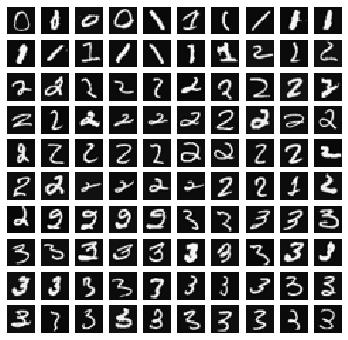

In [12]:
misAssignedSet = data['X'][misAssignedIndex,:]
show_hundred_digits(misAssignedSet)

https://stackoverflow.com/questions/40531646/scipy-optimize-function-matrixes-not-aligned

https://stackoverflow.com/questions/28735344/pythonvalueerror-shapes-3-and-118-1-not-aligned-3-dim-0-118-dim-0

https://stackoverflow.com/questions/25880634/logistic-regression-objects-are-not-aligned

# 2 Neural Network (Forward Propagation)

In [13]:
eights_file_path = '../course_materials/ex3weights.mat'
weights = loadmat(eights_file_path)
print(weights['Theta1'].shape)
print(weights['Theta2'].shape)

(25, 401)
(10, 26)


In [14]:
def get_data_NN(file_path):
    data = loadmat(file_path)
    X = data['X']
    y = data['y']
    return X, y

def get_sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(β_set, X):
    a = X
    for β in β_set:
        z = np.dot(np.insert(a, 0, 1, axis=1), β.T)
        a = get_sigmoid(z)
    return a


In [15]:
X, y = get_data_NN(file_path)
β_set = (weights['Theta1'], weights['Theta2'])
print(X.shape)
output = forward_propagation(β_set, X)
print (output.shape)
print (y.shape)
print ((output - y).shape)
yAssignment_NN = np.argmax(output, axis=-1) + 1
print (yAssignment_NN)
print (y.flatten())
print (np.sum(yAssignment_NN == y.flatten())/5000)

(5000, 400)
(5000, 10)
(5000, 1)
(5000, 10)
[10 10 10 ...  9  9  9]
[10 10 10 ...  9  9  9]
0.9752


In [16]:
1 - (np.array([np.arange(1,11),]* 5000) == y)

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [17]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [18]:
0.5 - (np.array([np.unique(y)]* y.shape[0]) == y)

array([[ 0.5,  0.5,  0.5, ...,  0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5, -0.5],
       ...,
       [ 0.5,  0.5,  0.5, ...,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5, -0.5,  0.5]])

http://cs229.stanford.edu/notes/cs229-notes1.pdf